In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime,date,time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier

In [23]:
data=pd.read_csv("bank.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [24]:
data.shape


(11162, 17)

In [25]:
data.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

no     5873
yes    5289
Name: deposit, dtype: int64


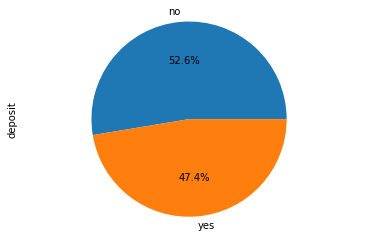

In [26]:
print(data["deposit"].value_counts())
data["deposit"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.axis("equal")
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
feature1=data.apply(label.fit_transform)
feature1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3,1


In [28]:
corr = feature1.corr()
corr.nlargest(17,'deposit')['deposit']

deposit      1.000000
duration     0.478913
previous     0.147624
pdays        0.146809
balance      0.142630
education    0.095948
marital      0.067610
job          0.063395
age          0.034860
month       -0.037121
default     -0.040680
day         -0.056326
loan        -0.110580
poutcome    -0.122369
campaign    -0.129856
housing     -0.203888
contact     -0.249847
Name: deposit, dtype: float64

In [29]:
x=feature1[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']]
y=feature1[['deposit']]

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [33]:
from sklearn.naive_bayes import GaussianNB
model = BaggingClassifier(base_estimator=GaussianNB() , n_estimators=5,bootstrap=True, bootstrap_features=False, oob_score=True, n_jobs=3, random_state=2, verbose=1)
model.fit(x_train, y_train)
model.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    5.2s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    4.9s finished


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [35]:
acc=model.score(x_train,y_train) 
print("Traning data = ",acc)
acc1=model.score(x_test,y_test) 
print("Testing Data",acc1)

[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    4.8s finished


Traning data =  0.7598835255907717
Testing Data 0.7487684729064039


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    4.9s finished


In [37]:
#Agian find Accuracy using Cross Validation and after this we can chooes algorithm what is overfitting[70 , 30]/underfitting[40,30]

from sklearn.model_selection import cross_val_score   #finding accuracy [1- tranning , 2-testing]
score=cross_val_score(model,x,y,cv=2)  #cv = 2 means 2 errors we calculating
print("Tanning and Testing Accuracy using Cross Validation =",score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    4.9s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    5.2s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

Tanning and Testing Accuracy using Cross Validation = [0.69276245 0.74605735]


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    5.2s finished
